<a href="https://colab.research.google.com/github/hasanskhan/BMWsuppliernetwork/blob/main/Networkanalysisbmw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
df = pd.read_csv('Networkanalysisdata v2.csv')
df.head()

,Company,Supplier,Level,Column1
0,BMW,Qualcomm Inc,8.0,80
1,BMW,Plug Power Inc,4.4,44
2,BMW,Lear Corp,7.2,72
3,BMW,Mercedes-Benz Group AG,9.2,92
4,BMW,NVIDIA Corp,7.8,78


In [ ]:
#empty graph
G2 = nx.DiGraph()
G2  = nx.from_pandas_edgelist(df, source = 'Company', target = 'Supplier', edge_attr= 'Level')

In [ ]:
#setting up the layout
pos = nx.kamada_kawai_layout(G2)
weights = list(nx.get_edge_attributes(G2, 'Level').values())
weights = [i/50 for i in weights]
weights

[0.16,
 0.08800000000000001,
 0.14400000000000002,
 0.184,
 0.156,
 0.16399999999999998,
 0.154,
 0.068,
 0.182,
 0.168,
 0.162,
 0.146,
 0.15,
 0.114,
 0.106,
 0.15,
 0.14800000000000002,
 0.17600000000000002,
 0.146,
 0.11800000000000001,
 0.14400000000000002,
 0.166,
 0.16,
 0.142,
 0.124,
 0.042,
 0.16,
 0.068,
 0.132,
 0.08800000000000001,
 0.08800000000000001,
 0.13,
 0.08800000000000001,
 0.128,
 0.172,
 0.14400000000000002,
 0.14400000000000002,
 0.136,
 0.16,
 0.092,
 0.156,
 0.182,
 0.16399999999999998,
 0.17600000000000002,
 0.184,
 0.156,
 0.154,
 0.124,
 0.12,
 0.146,
 0.14400000000000002,
 0.16399999999999998,
 0.156,
 0.156,
 0.156,
 0.156,
 0.156,
 0.156,
 0.156,
 0.156,
 0.156,
 0.142,
 0.17600000000000002,
 0.062,
 0.14400000000000002,
 0.11800000000000001,
 0.11199999999999999,
 0.142,
 0.16399999999999998,
 0.17600000000000002,
 0.16399999999999998,
 0.182,
 0.124,
 0.124,
 0.11599999999999999,
 0.114,
 0.142,
 0.11,
 0.068,
 0.094,
 0.17600000000000002,
 0.182,
 0.

In [ ]:
G2.nodes()

NodeView(('BMW', 'Qualcomm Inc', 'Plug Power Inc', 'Lear Corp', 'Mercedes-Benz Group AG', 'NVIDIA Corp', 'Amazon.com Inc', 'Samsung Electronics Co Ltd', 'Ballard Power Systems Inc', 'Infosys Ltd', 'Hitachi Ltd', 'Accenture PLC', 'Continental AG', 'Apple Inc', 'ANSYS Inc', 'Baidu Inc', 'Toyota Motor Corp', 'Ford Motor Co.', 'Intel Corp', 'Hewlett Packard Enterprise Co', 'Garmin Ltd', 'Delta Electronics Inc', 'AT&T Inc', 'Verizon Communications Inc', 'Semiconductor Manufacturing International Corp', 'Pixelworks Inc', 'MediaTek Inc', 'Johnson Matthey PLC', 'Kroger Co', 'Sysco Corp', 'Brookfield Renewable Partners LP', 'Gentherm Inc', 'Volvo AB', 'Cummins Inc', 'SK Innovation Co Ltd', 'TomTom NV', 'Microsoft Corp', 'Volkswagen AG', 'LG electronics Ltd', 'Synopsys Inc', 'Honda Motor Co Ltd', 'Penguin Solutions Inc', 'Fujitsu Ltd', 'FedEx Corp', 'Rivian Automotive Inc', 'XPO Inc', 'Foxconn Technology Co Ltd', 'Western Union Co', 'Mitsubishi Corp', 'Cisco Systems Inc', 'Rambus Inc', 'Skyworks

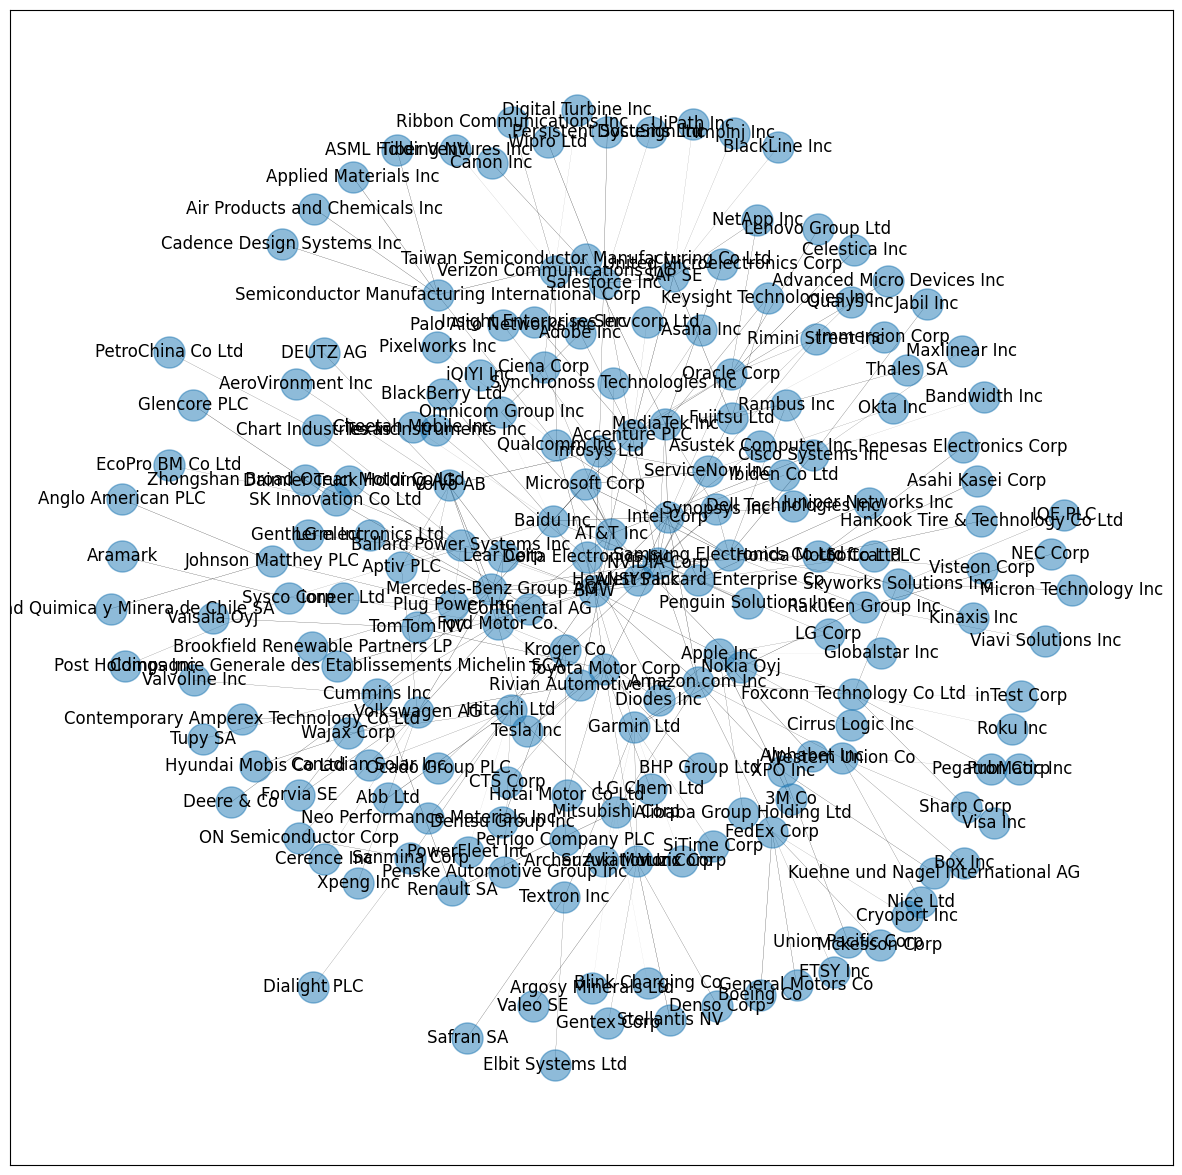

In [ ]:
plt.figure(figsize = (15,15))
nx.draw_networkx_nodes(G2, pos, node_size = 500, alpha = 0.5)
nx.draw_networkx_edges(G2, pos, width=weights)
nx.draw_networkx_labels(G2, pos)
plt.show()

In [ ]:
# @title Pyvis visualization
!pip install pyvis

In [39]:
from pyvis.network import Network
from IPython.core.display import display, HTML
net = Network(notebook = True, width = '2560px', height = '1440px', bgcolor = '#222222', font_color = 'white', cdn_resources = 'remote')

for node, deg in G2.degree():
  G2.nodes[node]['value'] = deg

net.from_nx(G2)

for edge in net.edges:
  edge['width'] = edge.get('Level', 1) #replace 1 with default edge width

net.save_graph('network.html')

with open('network.html', 'r') as f:
  html = f.read()
  display(HTML(html))